In [1]:
import os
import glob
import traceback
import numpy as np

from utils.main_function_helpers import *

os.environ['CUDA_VISIBLE_DEVICES'] = '2'


import torch
import argparse
import os
import yaml
import pathlib
import pickle
import logging
import sys
import time
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import torchvision
import glob
from torch.serialization import default_restore_location
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import numpy as np
from tensorboard.backend.event_processing import event_accumulator

import utils
import models 

from utils.data_helpers.load_datasets_helpers import *
from utils.meters import *
from utils.progress_bar import *
from utils.noise_model import get_noise
from utils.metrics import ssim,psnr
from utils.util_calculate_psnr_ssim import calculate_psnr,calculate_ssim
from utils.test_metrics import *

import copy


In [6]:
with open('histogram_data/stochastic_normalized_diff_tn0_t10000.pickle', 'rb') as f:
    normalized_diff_tn0 = pickle.load(f)

with open('histogram_data/stochastic_normalized_diff_tn25_t10000.pickle', 'rb') as f:
    normalized_diff_tn25 = pickle.load(f)
    
with open('histogram_data/stochastic_normalized_diff_tn50_t10000.pickle', 'rb') as f:
    normalized_diff_tn50 = pickle.load(f)

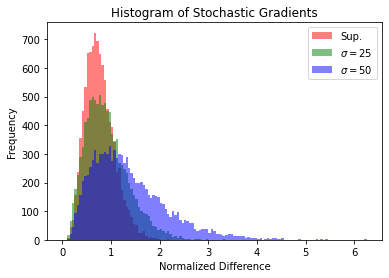

In [7]:
# Overlay the histograms
# Create a histogram of the data with three different colors
#plt.hist([normalized_diff_tn0, normalized_diff_tn25, normalized_diff_tn50], bins=int(np.sqrt(train_size)), alpha=0.5, label=['Sup.', '$\sigma = 25$', '$\sigma = 50$'], color=['red', 'green', 'blue'])
binwidth = 0.05 #1/int(np.sqrt(train_size))
data = []
for c in normalized_diff_tn0:
    data.append(c)
for c in normalized_diff_tn25:
    data.append(c)
for c in normalized_diff_tn50:
    data.append(c)
plt.hist(normalized_diff_tn0,bins=np.arange(min(data), max(data) + binwidth, binwidth), alpha=0.5, label='Sup.', color='red')
plt.hist(normalized_diff_tn25,bins=np.arange(min(data), max(data) + binwidth, binwidth), alpha=0.5, label='$\sigma = 25$', color='green')
plt.hist(normalized_diff_tn50,bins=np.arange(min(data), max(data) + binwidth, binwidth), alpha=0.5, label='$\sigma = 50$', color='blue')
# Add a legend to the plot
plt.legend(loc='upper right')

# Add labels and a title
plt.xlabel('Normalized Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Stochastic Gradients')

# Show the plot
plt.show()

In [8]:
# Mean of the plots
print('Mean of supervised gradients: ' + str(np.mean(normalized_diff_tn0)))
print('Mean of gradients when target noise = 25 : ' + str(np.mean(normalized_diff_tn25)))
print('Mean of gradients when target noise = 50 : ' + str(np.mean(normalized_diff_tn50)))


Mean of supervised gradients: 0.7674258715957403
Mean of gradients when target noise = 25 : 0.9172197199322283
Mean of gradients when target noise = 50 : 1.3690312671497464
